** Decade with the highest ratio of US-born nobel's winners: 2000
** In 2020 decade was the highest proportion of female laureates on literature category
** The first lady to win nobel prize was Marie Curie on physics category
** Individuals or organizations have won more than one Nobel Prize are ['International Committee of the Red Cross ', 'Marie Curie', 'Linus Pauling', 'Office of the United Nations High Commissioner for Refugees ', 'Frederick Sanger', 'Barry Sharpless', 'John Bardeen']


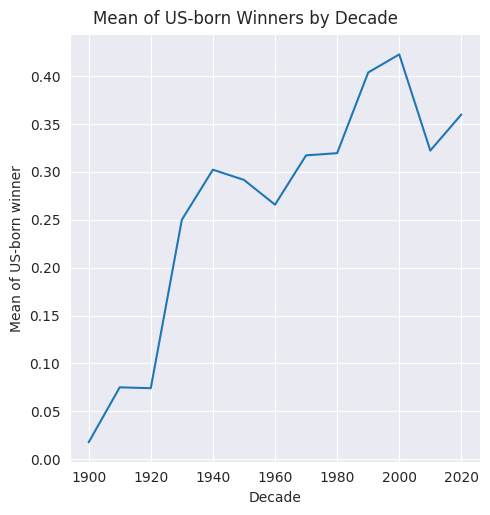

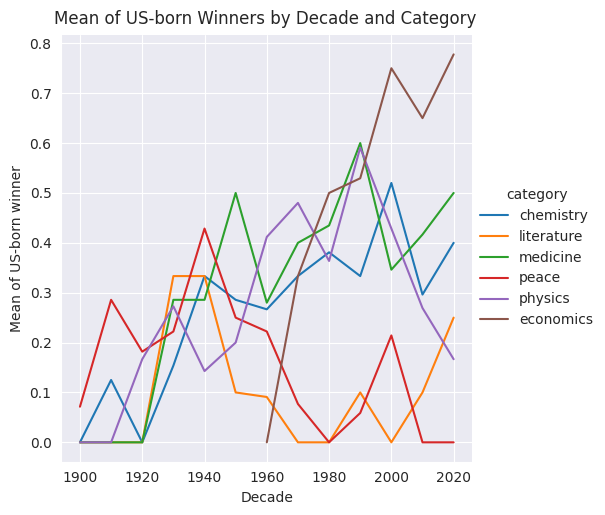

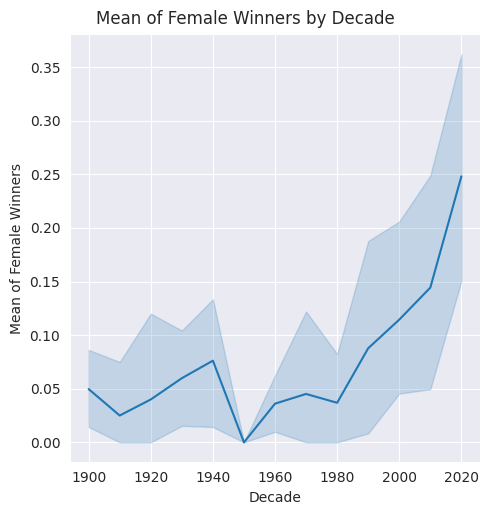

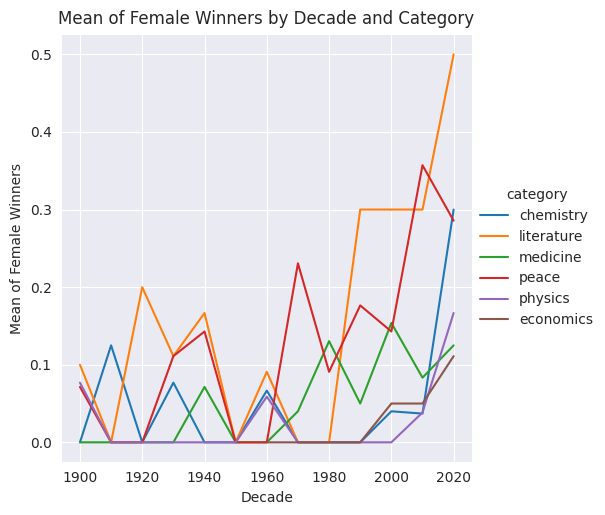

In [53]:
# Loading in required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

np_winners_df = pd.read_csv("/kaggle/input/noble-prize/nobel_laureates_data.csv")

# most commonly awarded gender and birth country

gender_count = np_winners_df["gender"].value_counts()
county_count = np_winners_df["bornCountry"].value_counts()
top_gender = gender_count.index[0]
top_country = county_count.index[0]
# Identify the decade with the highest ratio of US-born winners
np_winners_df["US-born winner"] = np_winners_df['bornCountry'] == 'USA'
np_winners_df["decade"] = (np.floor(np_winners_df['year'] / 10) * 10).astype(int)
us_born_winner_ratio = np_winners_df.groupby("decade", as_index=False).agg({'US-born winner': 'mean'})
us_born_winner = np_winners_df.groupby(["decade", "category"], as_index=False).agg({'US-born winner': 'mean'})
max_ratio = us_born_winner_ratio["US-born winner"].max()
max_decade_usa = us_born_winner_ratio[us_born_winner_ratio["US-born winner"] == max_ratio]
max_decade_usa = max_decade_usa['decade'].values[0]

print(f"** Decade with the highest ratio of US-born nobel's winners: {max_decade_usa}")


# decade and category with the highest proportion of female laureates
is_female = np_winners_df["gender"] == "female"
np_winners_df["female_winner"] = is_female
female_winners = np_winners_df.groupby(["decade", "category"], as_index=False)["female_winner"].mean()
max_f_ratio = female_winners["female_winner"].max()
max_decade_catg_female = female_winners[female_winners["female_winner"] == max_f_ratio][['decade', 'category']]
decade, category = max_decade_catg_female["decade"].values[0], max_decade_catg_female["category"].values[0]

print(f"** In {decade} decade was the highest proportion of female laureates on {category} category")

# first woman to receive a Nobel Prize, and in what category

female_winners_df = np_winners_df[is_female]
first_female_winner = female_winners_df[female_winners_df['year'] == female_winners_df['year'].min()]
first_woman_category = first_female_winner["category"].values[0]
first_woman_name = first_female_winner["fullName"].values[0]
print(f"** The first lady to win nobel prize was {first_woman_name} on {first_woman_category} category")

# individuals or organizations have won more than one Nobel Prize
win_2_or_more = np_winners_df["fullName"].value_counts()
repeat_list = list(win_2_or_more[win_2_or_more >= 2].index)

print(f"** Individuals or organizations have won more than one Nobel Prize are {repeat_list}")

sns.set_style("darkgrid")
ax1 = sns.relplot(x="decade", y="US-born winner", data=us_born_winner_ratio ,kind="line")
ax1.set(xlabel="Decade", ylabel="Mean of US-born winner")
ax1.fig.suptitle("Mean of US-born Winners by Decade", y=1.02)

ax2 = sns.relplot(x="decade", y="US-born winner", data=us_born_winner ,kind="line", hue="category")
ax2.set(xlabel="Decade", ylabel="Mean of US-born winner")
ax2.fig.suptitle("Mean of US-born Winners by Decade and Category", x=0.46, y=1.02)

ax3 = sns.relplot(x='decade', y='female_winner', data=female_winners, kind='line')
ax3.fig.suptitle("Mean of Female Winners by Decade", y=1.02)
ax3.set(xlabel="Decade", ylabel="Mean of Female Winners")

ax4 = sns.relplot(x='decade', y='female_winner', data=female_winners, kind='line', hue="category")
ax4.fig.suptitle("Mean of Female Winners by Decade and Category", x=0.46, y=1.02)
ax4.set(xlabel="Decade", ylabel="Mean of Female Winners")

plt.show()
